# pyGrades_UB 
### A python package for 
* automating the assignment of letter grades for UBLearns; and 
* automating the uploading of grades into UBHub



In [1]:
# Below is an example for a fictional class

## MTH XYZ : Intro to the alphabet's end
## Final grades calculation
## Dane Taylor, Spring 2020

In [2]:
import pandas as pd
from numpy import *
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Load spreadsheet, replace NA by 0, and delete specified columns

In [3]:
def load_grades_csv(filename,columns_to_delete):    
    df = pd.read_csv(filename)
    for column in columns_to_delete:
        del df[column]
    df = df.fillna(0)
    df = df.set_index('Student ID')
    return df

In [4]:
# Name of the file that was saved from UBLearns
filename = 'grades_from_UBLearns.csv'

# You can delete extra columns here if you want. For now, there are no extra columns
columns_to_delete = []
#columns_to_delete = ['Unnamed: 19']

df = load_grades_csv(filename,columns_to_delete)
df.head() # view firest couple columns of the spreadsheet

,Last Name,First Name,Username,HW 1 [Total Pts: 10 Score] |7328442,HW 2 [Total Pts: 10 Score] |7729253,HW 3 [Total Pts: 10 Score] |2233041,HW 4 [Total Pts: 10 Score] |1733046,Quiz1 [Total Pts: 10 Score] |1935047,HW 5 [Total Pts: 10 Score] |9336562,Midterm 1 [Total Pts: 50 Score] |1341611,HW 6 [Total Pts: 10 Score] |1350278,HW 7 [Total Pts: 20 Score] |5361226,QUIZ 2 [Total Pts: 10 Score] |3761229,HW 8 [Total Pts: 10 Score] |1361231,QUIZ 3 [Total Pts: 10 Score] |4761232,HW 9 [Total Pts: 10 Score] |5561237,Midterm 2 [Total Pts: 50 Score] |1361238,HW 10 [Total Pts: 10 Score] |4061241,Final Exam [Total Pts: 50 Score] |0661241
Student ID,,,,,,,,,,,,,,,,,,,
33333333,Buscemi,Steve,stevo,10,8,10,10.0,8,6,34,10,4.0,9.0,9,3,6.0,43,6,40
11111111,Murray,Bill,billy,1,4,8,9.0,9,8,49,10,0.0,0.0,5,10,0.0,49,6,38
44444444,Phoenix,Joaquin,phoeny,10,3,5,0.0,9,9,38,10,4.0,3.0,3,10,3.0,29,6,37
22222222,Whitaker,Forest,fwhit,9,8,9,8.0,9,10,49,10,20.0,10.0,8,10,10.0,45,2,47


###  Let's look at how Bill Murray did. His student id is 11111111

In [5]:
df.loc[11111111]

Last Name                                    Murray 
First Name                                      Bill
Username                                       billy
HW 1 [Total Pts: 10 Score] |7328442                1
HW 2 [Total Pts: 10 Score] |7729253                4
HW 3 [Total Pts: 10 Score] |2233041                8
HW 4 [Total Pts: 10 Score] |1733046                9
Quiz1 [Total Pts: 10 Score] |1935047               9
HW 5 [Total Pts: 10 Score] |9336562                8
Midterm 1 [Total Pts: 50 Score] |1341611          49
HW 6 [Total Pts: 10 Score] |1350278               10
HW 7 [Total Pts: 20 Score] |5361226                0
QUIZ 2 [Total Pts: 10 Score] |3761229              0
HW 8 [Total Pts: 10 Score] |1361231                5
QUIZ 3 [Total Pts: 10 Score] |4761232             10
HW 9 [Total Pts: 10 Score] |5561237                0
Midterm 2 [Total Pts: 50 Score] |1361238          49
HW 10 [Total Pts: 10 Score] |4061241               6
Final Exam [Total Pts: 50 Score] |0661241     

### Notice that the default names for the assingment  have the form:    
### name [Total Pts: XX Score] | YYYYYY

### The functions below process the assignments. Specifically, they
* group assignments into a category (e.g., homework), 
* identify the point values for each assignment, 
* compute the fraction of points that are obtained, and 
* save that into a new column

In [6]:
# these functions will be used and reused...

def extract_names_points_using_keyword(df,keyword='HW'):
    
    # 1. get list of assignments in which the keywor happens to be in the name
    assignment_names = list(df)#names of the assignments
    is_hw = [(keyword in name) for name in assignment_names] # true/false indicating whether assignment is a HW
    assignments = list(np.array(assignment_names)[np.array(is_hw)]) # restrict set of assignments to HWs only

    # 2. find the total possible number of HW points for these assignments
    possible_points = zeros(len(assignments))
    for i in range(len(assignments)):
        possible_points[i] = float(((assignments[i]).split('Pts: ')[1]).split(' ')[0])
        #possible_hw_points[i] = float(hw_name.split(' ')[4]))

    return assignments,possible_points 

def compute_average_and_make_new_column(keyword='HW',column_name='hw_av'):
    
    # 1. get the assignments and point values
    assignments,possible_points = extract_names_points_using_keyword(df,keyword)
    print('extracted assignments\n',assignments,'\n')
    print('extracted point_values\n',possible_points,'\n')    
    
    # 2. compute the fractions and asve them into a column
    percentages = df[assignments].sum(axis=1) / sum(possible_points)
    df.insert(loc=3, column=column_name, value=percentages)        
    return assignments,possible_points

## Compute average HW score

In [7]:
# make a new column with the percentage scores for their homeworks
keyword = 'HW' # the string 'HW' only shows up in the homework assignment titles
column_name='hw_av' # this is our new column
assignments,possible_points = compute_average_and_make_new_column(keyword=keyword,column_name=column_name)
df.head()

extracted assignments
 ['HW 1 [Total Pts: 10 Score] |7328442', 'HW 2 [Total Pts: 10 Score] |7729253', 'HW 3 [Total Pts: 10 Score] |2233041', 'HW 4 [Total Pts: 10 Score] |1733046', 'HW 5 [Total Pts: 10 Score] |9336562', 'HW 6 [Total Pts: 10 Score] |1350278', 'HW 7 [Total Pts: 20 Score] |5361226', 'HW 8 [Total Pts: 10 Score] |1361231', 'HW 9 [Total Pts: 10 Score] |5561237', 'HW 10 [Total Pts: 10 Score] |4061241'] 

extracted point_values
 [10. 10. 10. 10. 10. 10. 20. 10. 10. 10.] 



,Last Name,First Name,Username,hw_av,HW 1 [Total Pts: 10 Score] |7328442,HW 2 [Total Pts: 10 Score] |7729253,HW 3 [Total Pts: 10 Score] |2233041,HW 4 [Total Pts: 10 Score] |1733046,Quiz1 [Total Pts: 10 Score] |1935047,HW 5 [Total Pts: 10 Score] |9336562,Midterm 1 [Total Pts: 50 Score] |1341611,HW 6 [Total Pts: 10 Score] |1350278,HW 7 [Total Pts: 20 Score] |5361226,QUIZ 2 [Total Pts: 10 Score] |3761229,HW 8 [Total Pts: 10 Score] |1361231,QUIZ 3 [Total Pts: 10 Score] |4761232,HW 9 [Total Pts: 10 Score] |5561237,Midterm 2 [Total Pts: 50 Score] |1361238,HW 10 [Total Pts: 10 Score] |4061241,Final Exam [Total Pts: 50 Score] |0661241
Student ID,,,,,,,,,,,,,,,,,,,,
33333333,Buscemi,Steve,stevo,0.718182,10,8,10,10.0,8,6,34,10,4.0,9.0,9,3,6.0,43,6,40
11111111,Murray,Bill,billy,0.463636,1,4,8,9.0,9,8,49,10,0.0,0.0,5,10,0.0,49,6,38
44444444,Phoenix,Joaquin,phoeny,0.481818,10,3,5,0.0,9,9,38,10,4.0,3.0,3,10,3.0,29,6,37
22222222,Whitaker,Forest,fwhit,0.854545,9,8,9,8.0,9,10,49,10,20.0,10.0,8,10,10.0,45,2,47


# Compute average quiz score

In [8]:
# make a new column with the percentage scores for their homeworks
keyword = 'Q' # the character 'G' only shows up in the quiz assignment titles
column_name='quiz_av' # this is our new column
compute_average_and_make_new_column(keyword=keyword,column_name=column_name)
df.head()

extracted assignments
 ['Quiz1 [Total Pts: 10 Score] |1935047', 'QUIZ 2 [Total Pts: 10 Score] |3761229', 'QUIZ 3 [Total Pts: 10 Score] |4761232'] 

extracted point_values
 [10. 10. 10.] 



,Last Name,First Name,Username,quiz_av,hw_av,HW 1 [Total Pts: 10 Score] |7328442,HW 2 [Total Pts: 10 Score] |7729253,HW 3 [Total Pts: 10 Score] |2233041,HW 4 [Total Pts: 10 Score] |1733046,Quiz1 [Total Pts: 10 Score] |1935047,...,Midterm 1 [Total Pts: 50 Score] |1341611,HW 6 [Total Pts: 10 Score] |1350278,HW 7 [Total Pts: 20 Score] |5361226,QUIZ 2 [Total Pts: 10 Score] |3761229,HW 8 [Total Pts: 10 Score] |1361231,QUIZ 3 [Total Pts: 10 Score] |4761232,HW 9 [Total Pts: 10 Score] |5561237,Midterm 2 [Total Pts: 50 Score] |1361238,HW 10 [Total Pts: 10 Score] |4061241,Final Exam [Total Pts: 50 Score] |0661241
Student ID,,,,,,,,,,,,,,,,,,,,,
33333333,Buscemi,Steve,stevo,0.666667,0.718182,10,8,10,10.0,8,...,34,10,4.0,9.0,9,3,6.0,43,6,40
11111111,Murray,Bill,billy,0.633333,0.463636,1,4,8,9.0,9,...,49,10,0.0,0.0,5,10,0.0,49,6,38
44444444,Phoenix,Joaquin,phoeny,0.733333,0.481818,10,3,5,0.0,9,...,38,10,4.0,3.0,3,10,3.0,29,6,37
22222222,Whitaker,Forest,fwhit,0.966667,0.854545,9,8,9,8.0,9,...,49,10,20.0,10.0,8,10,10.0,45,2,47


## Compute midterm score

In [9]:
# make a new column with the percentage scores for their midterms
keyword = 'Mid' # the string 'Mid' only shows up in the midterm assignment titles
column_name='midterm_av' # this is our new column
compute_average_and_make_new_column(keyword=keyword,column_name=column_name)
df.head()

extracted assignments
 ['Midterm 1 [Total Pts: 50 Score] |1341611', 'Midterm 2 [Total Pts: 50 Score] |1361238'] 

extracted point_values
 [50. 50.] 



,Last Name,First Name,Username,midterm_av,quiz_av,hw_av,HW 1 [Total Pts: 10 Score] |7328442,HW 2 [Total Pts: 10 Score] |7729253,HW 3 [Total Pts: 10 Score] |2233041,HW 4 [Total Pts: 10 Score] |1733046,...,Midterm 1 [Total Pts: 50 Score] |1341611,HW 6 [Total Pts: 10 Score] |1350278,HW 7 [Total Pts: 20 Score] |5361226,QUIZ 2 [Total Pts: 10 Score] |3761229,HW 8 [Total Pts: 10 Score] |1361231,QUIZ 3 [Total Pts: 10 Score] |4761232,HW 9 [Total Pts: 10 Score] |5561237,Midterm 2 [Total Pts: 50 Score] |1361238,HW 10 [Total Pts: 10 Score] |4061241,Final Exam [Total Pts: 50 Score] |0661241
Student ID,,,,,,,,,,,,,,,,,,,,,
33333333,Buscemi,Steve,stevo,0.77,0.666667,0.718182,10,8,10,10.0,...,34,10,4.0,9.0,9,3,6.0,43,6,40
11111111,Murray,Bill,billy,0.98,0.633333,0.463636,1,4,8,9.0,...,49,10,0.0,0.0,5,10,0.0,49,6,38
44444444,Phoenix,Joaquin,phoeny,0.67,0.733333,0.481818,10,3,5,0.0,...,38,10,4.0,3.0,3,10,3.0,29,6,37
22222222,Whitaker,Forest,fwhit,0.94,0.966667,0.854545,9,8,9,8.0,...,49,10,20.0,10.0,8,10,10.0,45,2,47


## Move final column to be the first column

In [10]:
# make a new column with the percentage scores for their homeworks
keyword = 'Final' # the string 'Final' only shows up in the Final assignment title
column_name='final' # this is our new column
compute_average_and_make_new_column(keyword=keyword,column_name=column_name)
df.head()

# #final_col = 'Final [Total Pts: 50] |1135789'
# #df.insert(loc=0, column='final', value=2*df[final_col])

# midterm1 = 'Midterm 1 [Total Pts: 50 Score] |1341611'
# #midterm2 = 'Exam 2 [Total Pts: 50] |1128502'
# df.insert(loc=0, column='av_midterm', value=df[midterm1]*2  )
# df.head()

extracted assignments
 ['Final Exam [Total Pts: 50 Score] |0661241'] 

extracted point_values
 [50.] 



,Last Name,First Name,Username,final,midterm_av,quiz_av,hw_av,HW 1 [Total Pts: 10 Score] |7328442,HW 2 [Total Pts: 10 Score] |7729253,HW 3 [Total Pts: 10 Score] |2233041,...,Midterm 1 [Total Pts: 50 Score] |1341611,HW 6 [Total Pts: 10 Score] |1350278,HW 7 [Total Pts: 20 Score] |5361226,QUIZ 2 [Total Pts: 10 Score] |3761229,HW 8 [Total Pts: 10 Score] |1361231,QUIZ 3 [Total Pts: 10 Score] |4761232,HW 9 [Total Pts: 10 Score] |5561237,Midterm 2 [Total Pts: 50 Score] |1361238,HW 10 [Total Pts: 10 Score] |4061241,Final Exam [Total Pts: 50 Score] |0661241
Student ID,,,,,,,,,,,,,,,,,,,,,
33333333,Buscemi,Steve,stevo,0.80,0.77,0.666667,0.718182,10,8,10,...,34,10,4.0,9.0,9,3,6.0,43,6,40
11111111,Murray,Bill,billy,0.76,0.98,0.633333,0.463636,1,4,8,...,49,10,0.0,0.0,5,10,0.0,49,6,38
44444444,Phoenix,Joaquin,phoeny,0.74,0.67,0.733333,0.481818,10,3,5,...,38,10,4.0,3.0,3,10,3.0,29,6,37
22222222,Whitaker,Forest,fwhit,0.94,0.94,0.966667,0.854545,9,8,9,...,49,10,20.0,10.0,8,10,10.0,45,2,47


## Compute grade score (the score on which the letter grade is decided) and make a new column

In [11]:
# Midterms are 40%
# HW is 35%
# Quizes are 5%
# Final is 20%

scores = np.array( df['midterm_av']*.4 + df['hw_av']*.35 + df['quiz_av']*.05 + df['final']*.2)  * 100
df.insert(loc=3, column='grade_score', value=scores)
df.head()

,Last Name,First Name,Username,grade_score,final,midterm_av,quiz_av,hw_av,HW 1 [Total Pts: 10 Score] |7328442,HW 2 [Total Pts: 10 Score] |7729253,...,Midterm 1 [Total Pts: 50 Score] |1341611,HW 6 [Total Pts: 10 Score] |1350278,HW 7 [Total Pts: 20 Score] |5361226,QUIZ 2 [Total Pts: 10 Score] |3761229,HW 8 [Total Pts: 10 Score] |1361231,QUIZ 3 [Total Pts: 10 Score] |4761232,HW 9 [Total Pts: 10 Score] |5561237,Midterm 2 [Total Pts: 50 Score] |1361238,HW 10 [Total Pts: 10 Score] |4061241,Final Exam [Total Pts: 50 Score] |0661241
Student ID,,,,,,,,,,,,,,,,,,,,,
33333333,Buscemi,Steve,stevo,75.269697,0.80,0.77,0.666667,0.718182,10,8,...,34,10,4.0,9.0,9,3,6.0,43,6,40
11111111,Murray,Bill,billy,73.793939,0.76,0.98,0.633333,0.463636,1,4,...,49,10,0.0,0.0,5,10,0.0,49,6,38
44444444,Phoenix,Joaquin,phoeny,62.130303,0.74,0.67,0.733333,0.481818,10,3,...,38,10,4.0,3.0,3,10,3.0,29,6,37
22222222,Whitaker,Forest,fwhit,91.142424,0.94,0.94,0.966667,0.854545,9,8,...,49,10,20.0,10.0,8,10,10.0,45,2,47


### Visualize a historgram of the scores

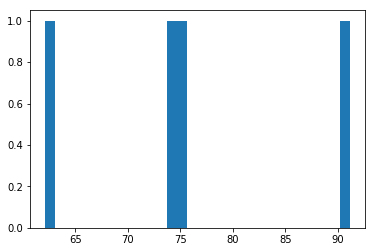

In [12]:
hist(scores,30);

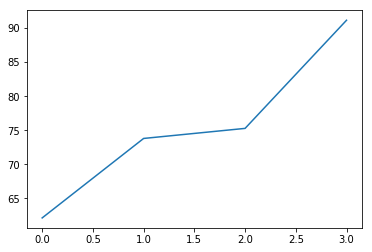

In [13]:
plot(sort(scores))

## Assign letter grades

First, define a map between grade scores and letter grades

In [14]:
grading_scheme = { 'A' :  [92, 200],
...                'A-':  [90, 92],
...                'B+':  [87, 90],
...                'B' :  [83, 87],
...                'B-':  [80, 83],
...                'C+':  [77, 80],
...                'C' :  [73, 77],
...                'C-':  [70, 73],
...                'D' :  [60, 70],
...                'F' :  [0, 60]}

In [15]:
def score_to_letter_grade(score,grading_scheme):
    letter_grade = 'X'
    for key,val in grading_scheme.items():
        if score >= val[0]:
            #print(key)
            letter_grade = key
            break

    return letter_grade

In [16]:
letter_grades = [score_to_letter_grade(score,grading_scheme) for score in scores]
df.insert(loc=3, column='letter_grades', value=letter_grades)

In [17]:
df = df.sort_values('grade_score',ascending=False)
df

,Last Name,First Name,Username,letter_grades,grade_score,final,midterm_av,quiz_av,hw_av,HW 1 [Total Pts: 10 Score] |7328442,...,Midterm 1 [Total Pts: 50 Score] |1341611,HW 6 [Total Pts: 10 Score] |1350278,HW 7 [Total Pts: 20 Score] |5361226,QUIZ 2 [Total Pts: 10 Score] |3761229,HW 8 [Total Pts: 10 Score] |1361231,QUIZ 3 [Total Pts: 10 Score] |4761232,HW 9 [Total Pts: 10 Score] |5561237,Midterm 2 [Total Pts: 50 Score] |1361238,HW 10 [Total Pts: 10 Score] |4061241,Final Exam [Total Pts: 50 Score] |0661241
Student ID,,,,,,,,,,,,,,,,,,,,,
22222222,Whitaker,Forest,fwhit,A-,91.142424,0.94,0.94,0.966667,0.854545,9,...,49,10,20.0,10.0,8,10,10.0,45,2,47
33333333,Buscemi,Steve,stevo,C,75.269697,0.80,0.77,0.666667,0.718182,10,...,34,10,4.0,9.0,9,3,6.0,43,6,40
11111111,Murray,Bill,billy,C,73.793939,0.76,0.98,0.633333,0.463636,1,...,49,10,0.0,0.0,5,10,0.0,49,6,38
44444444,Phoenix,Joaquin,phoeny,D,62.130303,0.74,0.67,0.733333,0.481818,10,...,38,10,4.0,3.0,3,10,3.0,29,6,37


### Save letter grades to a csv that can be uploaded into UBHub

The file must contain 2 columns: student id, letter grade

In [18]:
filename = 'students_final_grades.csv'
df['letter_grades'].to_csv(filename, index = True, header=False)

## Study results

### Let's again look at Bill Murray. His student id is 11111111. 
#### We can see he mainly did poorly because his average homework score was low

In [19]:
df.loc[11111111]

Last Name                                     Murray 
First Name                                       Bill
Username                                        billy
letter_grades                                       C
grade_score                                   73.7939
final                                            0.76
midterm_av                                       0.98
quiz_av                                      0.633333
hw_av                                        0.463636
HW 1 [Total Pts: 10 Score] |7328442                 1
HW 2 [Total Pts: 10 Score] |7729253                 4
HW 3 [Total Pts: 10 Score] |2233041                 8
HW 4 [Total Pts: 10 Score] |1733046                 9
Quiz1 [Total Pts: 10 Score] |1935047                9
HW 5 [Total Pts: 10 Score] |9336562                 8
Midterm 1 [Total Pts: 50 Score] |1341611           49
HW 6 [Total Pts: 10 Score] |1350278                10
HW 7 [Total Pts: 20 Score] |5361226                 0
QUIZ 2 [Total Pts: 10 Score]

## Let's see how many of each letter grade

In [20]:
df.groupby(['letter_grades']).count()

,Last Name,First Name,Username,grade_score,final,midterm_av,quiz_av,hw_av,HW 1 [Total Pts: 10 Score] |7328442,HW 2 [Total Pts: 10 Score] |7729253,...,Midterm 1 [Total Pts: 50 Score] |1341611,HW 6 [Total Pts: 10 Score] |1350278,HW 7 [Total Pts: 20 Score] |5361226,QUIZ 2 [Total Pts: 10 Score] |3761229,HW 8 [Total Pts: 10 Score] |1361231,QUIZ 3 [Total Pts: 10 Score] |4761232,HW 9 [Total Pts: 10 Score] |5561237,Midterm 2 [Total Pts: 50 Score] |1361238,HW 10 [Total Pts: 10 Score] |4061241,Final Exam [Total Pts: 50 Score] |0661241
letter_grades,,,,,,,,,,,,,,,,,,,,,
A-,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
C,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
D,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


### Lets  look at who got C's

In [21]:
C_students = df['letter_grades'] =='C'
df[C_students]

,Last Name,First Name,Username,letter_grades,grade_score,final,midterm_av,quiz_av,hw_av,HW 1 [Total Pts: 10 Score] |7328442,...,Midterm 1 [Total Pts: 50 Score] |1341611,HW 6 [Total Pts: 10 Score] |1350278,HW 7 [Total Pts: 20 Score] |5361226,QUIZ 2 [Total Pts: 10 Score] |3761229,HW 8 [Total Pts: 10 Score] |1361231,QUIZ 3 [Total Pts: 10 Score] |4761232,HW 9 [Total Pts: 10 Score] |5561237,Midterm 2 [Total Pts: 50 Score] |1361238,HW 10 [Total Pts: 10 Score] |4061241,Final Exam [Total Pts: 50 Score] |0661241
Student ID,,,,,,,,,,,,,,,,,,,,,
33333333,Buscemi,Steve,stevo,C,75.269697,0.80,0.77,0.666667,0.718182,10,...,34,10,4.0,9.0,9,3,6.0,43,6,40
11111111,Murray,Bill,billy,C,73.793939,0.76,0.98,0.633333,0.463636,1,...,49,10,0.0,0.0,5,10,0.0,49,6,38
